In [ ]:

!pip install keras==2.2.5
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 48kB/s 
     |████████████████████████████████| 3.2MB 26.1MB/s 
     |████████████████████████████████| 491kB 41.0MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
import os
import sys
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
import cv2

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
! rm -rf unet

In [ ]:
!unzip unet.zip

Archive:  unet.zip
   creating: unet/
   creating: unet/test/
   creating: unet/test/Socket1_164218_json/
   creating: unet/test/Socket1_164218_json/images/
  inflating: unet/test/Socket1_164218_json/images/img-resized.jpg  
   creating: unet/test/Socket1_164218_json/masks/
  inflating: unet/test/Socket1_164218_json/masks/label-resized.jpg  
   creating: unet/test/Socket1_171506_json/
   creating: unet/test/Socket1_171506_json/images/
  inflating: unet/test/Socket1_171506_json/images/img-resized.jpg  
   creating: unet/test/Socket1_171506_json/masks/
  inflating: unet/test/Socket1_171506_json/masks/label-resized.jpg  
   creating: unet/test/Socket1_172922_json/
   creating: unet/test/Socket1_172922_json/images/
  inflating: unet/test/Socket1_172922_json/images/img-resized.jpg  
   creating: unet/test/Socket1_172922_json/masks/
  inflating: unet/test/Socket1_172922_json/masks/label-resized.jpg  
   creating: unet/test/Socket1_174658_json/
   creating: unet/test/Socket1_174658_json/image

In [ ]:
for (dir_path, dir_names, file_names) in os.walk('./unet'):
    for f in file_names:
        if f == 'label-resized.jpg':
            print('FILE:', os.path.join(dir_path, f))
            full_path = os.path.join(dir_path, f)
            img = cv2.imread(full_path)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(os.path.join(dir_path, "label-resized.jpg"), img_gray)

FILE: ./unet/test/Socket1_180316_json/masks/label-resized.jpg
FILE: ./unet/test/Socket1_174658_json/masks/label-resized.jpg
FILE: ./unet/test/Socket1_171506_json/masks/label-resized.jpg
FILE: ./unet/test/Socket1_164218_json/masks/label-resized.jpg
FILE: ./unet/test/Socket1_172922_json/masks/label-resized.jpg
FILE: ./unet/train/Socket2_171509_json/masks/label-resized.jpg
FILE: ./unet/train/Socket1_180316_json/masks/label-resized.jpg
FILE: ./unet/train/Socket1_174658_json/masks/label-resized.jpg
FILE: ./unet/train/Socket2_164222_json/masks/label-resized.jpg
FILE: ./unet/train/Socket1_171506_json/masks/label-resized.jpg
FILE: ./unet/train/Socket2_172926_json/masks/label-resized.jpg
FILE: ./unet/train/Socket1_164218_json/masks/label-resized.jpg
FILE: ./unet/train/Socket1_172922_json/masks/label-resized.jpg
FILE: ./unet/train/Socket2_180320_json/masks/label-resized.jpg
FILE: ./unet/train/Socket2_174702_json/masks/label-resized.jpg
FILE: ./unet/train/Socket1_181357_json/masks/label-resized.j

In [ ]:
for (dir_path, dir_names, file_names) in os.walk('./unet'):
    for f in file_names:
            print('FILE:', os.path.join(dir_path, f))
            full_path = os.path.join(dir_path, f)
            img = imread(full_path)
            print(img.shape)

FILE: ./unet/test/Socket1_180316_json/images/img-resized.jpg
(456, 684, 3)
FILE: ./unet/test/Socket1_180316_json/masks/label-resized.jpg
(456, 684)
FILE: ./unet/test/Socket1_174658_json/images/img-resized.jpg
(456, 684, 3)
FILE: ./unet/test/Socket1_174658_json/masks/label-resized.jpg
(456, 684)
FILE: ./unet/test/Socket1_171506_json/images/img-resized.jpg
(456, 684, 3)
FILE: ./unet/test/Socket1_171506_json/masks/label-resized.jpg
(456, 684)
FILE: ./unet/test/Socket1_164218_json/images/img-resized.jpg
(456, 684, 3)
FILE: ./unet/test/Socket1_164218_json/masks/label-resized.jpg
(456, 684)
FILE: ./unet/test/Socket1_172922_json/images/img-resized.jpg
(456, 684, 3)
FILE: ./unet/test/Socket1_172922_json/masks/label-resized.jpg
(456, 684)
FILE: ./unet/train/Socket2_171509_json/images/img-resized.jpg
(456, 684, 3)
FILE: ./unet/train/Socket2_171509_json/masks/label-resized.jpg
(456, 684)
FILE: ./unet/train/Socket1_180316_json/images/img-resized.jpg
(456, 684, 3)
FILE: ./unet/train/Socket1_180316_

In [ ]:
# Set some parameters
IMG_WIDTH = 300
IMG_HEIGHT = 150
IMG_CHANNELS = 3

TRAIN_PATH = './unet/train/'#enter path to training data
TEST_PATH = './unet/test/'#enter path to testing data

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

print("Imported all the dependencies")

# Get train and test IDs
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

# Get and resize train images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print("X_train",X_train.shape)
print("Y_train",Y_train.shape)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
	path = TRAIN_PATH + id_
	#img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
	img = imread(path + '/images/' + 'img-resized.jpg')[:,:,:IMG_CHANNELS]
	img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
	X_train[n] = img
	mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
	for mask_file in next(os.walk(path + '/masks/'))[2]:
		mask_ = imread(path + '/masks/' + mask_file)
		mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',preserve_range=True), axis=-1)
		mask = np.maximum(mask, mask_)
	Y_train[n] = mask
# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + 'img-resized.jpg')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Imported all the dependencies
X_train (11, 150, 300, 3)
Y_train (11, 150, 300, 1)
Getting and resizing train images and masks ... 


100%|██████████| 11/11 [00:00<00:00, 16.15it/s]

Getting and resizing test images ... 



100%|██████████| 5/5 [00:00<00:00, 19.76it/s]

Done!


In [ ]:
#https://stackoverflow.com/questions/58266749/a-concatenate-layer-requires-inputs-with-matching-shapes-except-for-the-conca
# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

ValueError: ignored

In [ ]:
# Fit model
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=30, 
                    callbacks=[earlystopper, checkpointer])

Train on 9 samples, validate on 2 samples
Epoch 1/30
9/9 [==============================] - 10s 1s/step - loss: 0.6827 - acc: 0.5775 - val_loss: 0.6170 - val_acc: 0.6352

Epoch 00001: val_loss improved from inf to 0.61701, saving model to model-dsbowl2018-1.h5
Epoch 2/30
9/9 [==============================] - 7s 806ms/step - loss: 0.6401 - acc: 0.6349 - val_loss: 0.5877 - val_acc: 0.6815

Epoch 00002: val_loss improved from 0.61701 to 0.58774, saving model to model-dsbowl2018-1.h5
Epoch 3/30
9/9 [==============================] - 7s 798ms/step - loss: 0.6152 - acc: 0.6750 - val_loss: 0.5645 - val_acc: 0.6835

Epoch 00003: val_loss improved from 0.58774 to 0.56445, saving model to model-dsbowl2018-1.h5
Epoch 4/30
9/9 [==============================] - 7s 814ms/step - loss: 0.5833 - acc: 0.6840 - val_loss: 0.5435 - val_acc: 0.7053

Epoch 00004: val_loss improved from 0.56445 to 0.54354, saving model to model-dsbowl2018-1.h5
Epoch 5/30
9/9 [==============================] - 7s 817ms/step 

model-dsbowl2018-1.h5
./test.jpg
256
256
3
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 256, 256, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_77 (Conv2D)              (None, 256, 256, 16) 448         lambda_5[0][0]                   
__________________________________________________________________________________________________
dropout_37 (Dropout)            (None, 256, 256, 16) 0           conv2d_77[0][0]                  
_________________________________________________

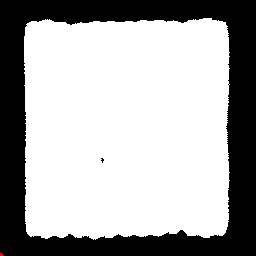

24 18 206 222


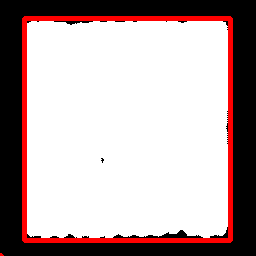

100 157 5 7


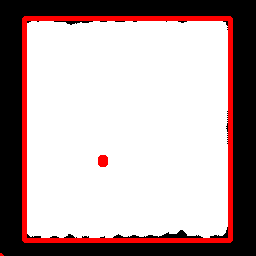

227 83 3 3


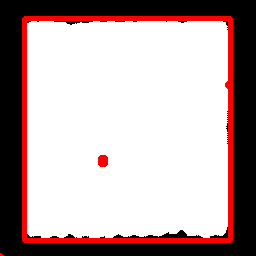

Showing images..


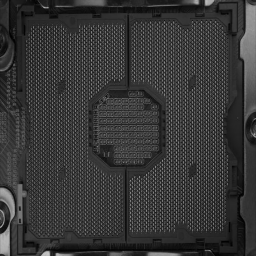

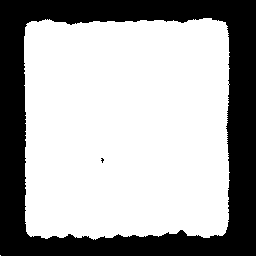

In [ ]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt


from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow

class automaticmaplabelling():
    def __init__(self,modelPath,full_chq,imagePath,width,height,channels):
        print (modelPath)
        print(imagePath)
        print(width)
        print(height)
        print(channels)
        self.modelPath=modelPath
        self.full_chq=full_chq
        self.imagePath=imagePath
        self.IMG_WIDTH=width
        self.IMG_HEIGHT=height
        self.IMG_CHANNELS=channels
        self.model = self.U_net()
        
    def mean_iou(self,y_true, y_pred):
        prec = []
        for t in np.arange(0.5, 1.0, 0.05):
            y_pred_ = tf.to_int32(y_pred > t)
            score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
            K.get_session().run(tf.local_variables_initializer())
            with tf.control_dependencies([up_opt]):
                score = tf.identity(score)
            prec.append(score)
        return K.mean(K.stack(prec), axis=0)

    def U_net(self):
        # Build U-Net model
        inputs = Input((self.IMG_HEIGHT, self.IMG_WIDTH, self.IMG_CHANNELS))
        s = Lambda(lambda x: x / 255) (inputs)

        c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
        c1 = Dropout(0.1) (c1)
        c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
        p1 = MaxPooling2D((2, 2)) (c1)

        c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
        c2 = Dropout(0.1) (c2)
        c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
        p2 = MaxPooling2D((2, 2)) (c2)

        c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
        c3 = Dropout(0.2) (c3)
        c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
        p3 = MaxPooling2D((2, 2)) (c3)

        c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
        c4 = Dropout(0.2) (c4)
        c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
        p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

        c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
        c5 = Dropout(0.3) (c5)
        c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

        u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
        u6 = concatenate([u6, c4])
        c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
        c6 = Dropout(0.2) (c6)
        c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

        u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
        u7 = concatenate([u7, c3])
        c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
        c7 = Dropout(0.2) (c7)
        c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

        u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
        u8 = concatenate([u8, c2])
        c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
        c8 = Dropout(0.1) (c8)
        c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

        u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
        u9 = concatenate([u9, c1], axis=3)
        c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
        c9 = Dropout(0.1) (c9)
        c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

        outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

        model = Model(inputs=[inputs], outputs=[outputs])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[self.mean_iou])
        model.load_weights(self.modelPath)
        model.summary()
        return model

    def prediction(self):
        img=cv2.imread(self.imagePath,0)
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)

        img=np.expand_dims(img,axis=-1)
        x_test= np.zeros((1, self.IMG_HEIGHT, self.IMG_WIDTH, self.IMG_CHANNELS), dtype=np.uint8)
        #testimg=resize(img,(self.IMG_HEIGHT,self.IMG_WIDTH),mode='constant',preserve_range=True)
        x_test[0]=img
        preds_test= self.model.predict(x_test, verbose=1)
        
        preds_test = (preds_test > 0.5).astype(np.uint8)
        mask=preds_test[0]
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                if mask[i][j] == 1:
                    mask[i][j] = 255
                else:
                    mask[i][j] = 0
        merged_image = cv2.merge((mask,mask,mask))
        contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        for each_contour in contours:
            x,y,w,h = cv2.boundingRect(each_contour)

            cv2.rectangle(merged_image,(x,y),(x+w,y+h),(0,0,255),4)

            print (x,y,w,h)
            cv2_imshow(merged_image)
            cv2.waitKey(0)
        
        cv2.imwrite("mask.png",mask)

        return x_test[0],mask

def main():
    test_image_name = "./test.jpg"
    #automaticmaplabellingobj= automaticmaplabelling('model-dsbowl2018-1.h5',True,test_image_name,128,128,3)
    automaticmaplabellingobj= automaticmaplabelling('model-dsbowl2018-1.h5',True,test_image_name,256,256,3)
    testimg,mask = automaticmaplabellingobj.prediction()
    print('Showing images..')
    cv2_imshow(testimg)
    dim = (1280, 1280)
    resized = cv2.resize(mask, dim, interpolation = cv2.INTER_AREA)
    
    cv2_imshow(mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite("resized_mask.png",resized)

if __name__ == "__main__":
    main()